In [1]:
import pandas as pd
import numpy as np

In [2]:
# load from pkl
decisions = pd.read_pickle('decisions.pkl')
decisions.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
LLLLLL,NaN,L,L,Tie,L,Tie,L,L,L,L,...,L,L,L,L,L,L,L,Tie,L,L
LLLLLR,NaN,Tie,L,Tie,L,Tie,Tie,L,R,R,...,L,L,R,L,L,Tie,R,Tie,R,L
LLLLRL,NaN,Tie,L,Tie,L,Tie,Tie,L,R,R,...,L,L,L,L,L,Tie,Tie,Tie,L,L
LLLLRR,NaN,Tie,R,Tie,R,Tie,Tie,L,R,R,...,R,L,L,L,L,Tie,R,Tie,R,L
LLLRLL,NaN,Tie,L,Tie,L,Tie,Tie,L,L,R,...,L,L,L,L,L,Tie,Tie,Tie,L,L


In [3]:
# count the number of L in the index
decisions['L_count'] = decisions.index.str.count('L')
# correct is 'L' if L_count > 3, 'None' if L_count == 3, and 'R' if L_count < 3
decisions['correct'] = np.where(decisions['L_count'] > 3, 'L', 
                                np.where(decisions['L_count'] == 3, 'None', 'R'))
decisions.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,L_count,correct
LLLLLL,NaN,L,L,Tie,L,Tie,L,L,L,L,...,L,L,L,L,L,Tie,L,L,6,L
LLLLLR,NaN,Tie,L,Tie,L,Tie,Tie,L,R,R,...,R,L,L,Tie,R,Tie,R,L,5,L
LLLLRL,NaN,Tie,L,Tie,L,Tie,Tie,L,R,R,...,L,L,L,Tie,Tie,Tie,L,L,5,L
LLLLRR,NaN,Tie,R,Tie,R,Tie,Tie,L,R,R,...,L,L,L,Tie,R,Tie,R,L,4,L
LLLRLL,NaN,Tie,L,Tie,L,Tie,Tie,L,L,R,...,L,L,L,Tie,Tie,Tie,L,L,5,L


In [4]:
# drop columns with NaN
decisions = decisions.dropna(axis=1, how='all')
decisions.head()

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,L_count,correct
LLLLLL,L,L,Tie,L,Tie,L,L,L,L,L,...,L,L,L,L,L,Tie,L,L,6,L
LLLLLR,Tie,L,Tie,L,Tie,Tie,L,R,R,L,...,R,L,L,Tie,R,Tie,R,L,5,L
LLLLRL,Tie,L,Tie,L,Tie,Tie,L,R,R,L,...,L,L,L,Tie,Tie,Tie,L,L,5,L
LLLLRR,Tie,R,Tie,R,Tie,Tie,L,R,R,R,...,L,L,L,Tie,R,Tie,R,L,4,L
LLLRLL,Tie,L,Tie,L,Tie,Tie,L,L,R,L,...,L,L,L,Tie,Tie,Tie,L,L,5,L


0.5227272727272727
0.8409090909090909


array([[<Axes: title={'center': 'Reliability'}>]], dtype=object)

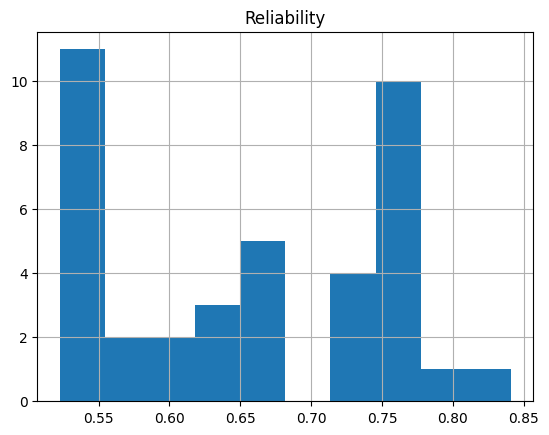

In [15]:
def reliability(column, decisions):
    """
    Calculate the reliability of a column in the decisions DataFrame.
    Reliability is defined as the proportion of correct decisions, where a Tie is always considered half correct.
    """
    correct_count = np.where(decisions[column] == decisions['correct'], 1, 0).sum()
    correct_count += (decisions[column] == 'Tie').sum() * 0.5  # Count Ties as half correct
    # total count is the number of non-"None" entries in the "correct" column
    total_count = decisions['correct'][decisions['correct'] != 'None'].count()
    
    return correct_count / total_count if total_count > 0 else 0

# Calculate reliability for each column
reliabilities = {col: reliability(col, decisions) for col in decisions.columns if col not in ['L_count', 'correct']}
# Convert to DataFrame for better visualization
reliability_df = pd.DataFrame.from_dict(reliabilities, orient='index', columns=['Reliability'])
reliability_df.sort_values(by='Reliability', ascending=False, inplace=True)

print(min(reliability_df['Reliability']))
print(max(reliability_df['Reliability']))
reliability_df.hist()
    

In [8]:
decisions['correct'][decisions['correct'] != 'None'].count()

44

In [21]:
for i, d in enumerate(decisions[7]):
    print(d, decisions['correct'][i])
print(i + 1)

L L
L L
L L
L L
L L
L L
L L
L None
L L
L L
L L
L None
L L
L None
L None
R R
L L
L L
L L
L None
L L
L None
L None
L R
L L
L None
L None
L R
L None
L R
L R
R R
L L
L L
L L
L None
L L
L None
L None
L R
L L
L None
L None
L R
L None
L R
L R
R R
L L
L None
L None
L R
L None
L R
L R
R R
L None
L R
L R
R R
L R
R R
R R
R R
64


C:\Users\caele\AppData\Local\Temp\ipykernel_8780\3602820610.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(d, decisions['correct'][i])


In [22]:
29/44

0.6590909090909091

In [ ]:
reliability(7, decisions)